# Logistic regression

- This tutorial aims to explain the binary classification model, a logistic regression, and understand the mathematical concepts behind the algorithm.

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Understand odds ratio and sigmoid function

- Simply, odds is a probability where a certain event occurs. Odds ratio can be written as ${p \over 1-p}$ where p is the probablity of positive sample (positive sample refers to a certain event or class eg. $y = 1$). 


- Logit function can be defined by taking logarithm to the odds ratio: 

    $logit(p) = log{p \over 1-p}$


- The linear relationship between $z$ (summation of features times weights) and logit function is formulated: 

    $logit(p(y=1|x) = w_0x_0 + w_1x_1 + ... + w_mx_m = z = \sum_{i=0}^m w_i x_i = w^Tx$


- The inverse of the logit function is the sigmoid function. 

    $\phi (z) = {1 \over 1 + e^-z}$ where $z = w_0x_0 + w_1x_1 + ... + w_mx_m = w^Tx$

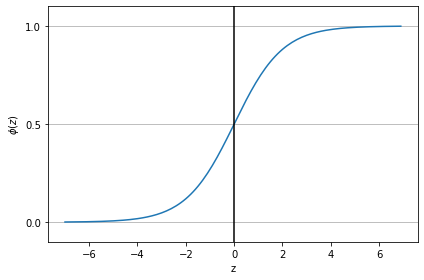

In [4]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim((-0.1, 1.1))
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

### Loss function of logistic regression

- The loss (cost) function of logistic regression is **log loss**, which is derived from **log likelihood function**. 

    $J(w) = \sum_{i=1}^n [-y^i log(\phi(z^i))-(1-y^i)log(1-\phi(z^i))]$ for binary classification $y = {0, 1}$
    
    
- Below graph (log loss vs. sigmoid activation) shows that the cost of prediction rises to infinity when the model misses (eg. predict 1 when y = 0 or vice versa) and drops to 0 when the model gets correct label.

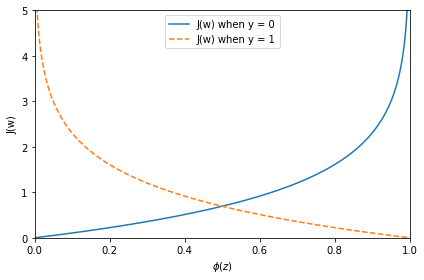

In [6]:
def loss_0(z):
    return -np.log(1-sigmoid(z))

def loss_1(z):
    return -np.log(sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
l_0 = [loss_0(l) for l in z]
plt.plot(phi_z, l_0, label='J(w) when y = 0')
l_1 = [loss_1(l) for l in z]
plt.plot(phi_z, l_1, label='J(w) when y = 1', linestyle='--')
plt.xlim((0, 1))
plt.ylim((0, 5))
plt.xlabel('$\phi (z)$')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Train a logistic regression model using scikit-learn API

In [ ]:
# To be updated